<a href="https://colab.research.google.com/github/youngkeysa/MLkofia/blob/main/5_%EA%B5%AD%EB%82%B4%EC%A3%BC%EC%8B%9D%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

먼저 그림에서 한글이 깨지는 문제를 해결하기 위한 패키지를 설치한다.

In [1]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.3 MB/s eta 0:00:00


국내 종목 데이터와 GICS (섹터 구분) 데이터를 다운로드 한 후, 이를 불러온다.

In [ ]:
import gdown
import pandas as pd

# 국내 종목 데이터
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020502

file_id_1 = '15BTNVGPTBKNbU2UJvEpaPaTmfIVZAk3C'
url_1 = f'https://drive.google.com/uc?id={file_id_1}'
gdown.download(url_1, 'stock_data.xlsx', quiet=False)

# GICS 데이터
# https://index.krx.co.kr/contents/MKD/03/0303/03030204/MKD03030204.jsp
file_id_2 = '1ZeKT8-vppNd8s1awpUWE7MpkC8qbUh2L'
url_2 = f'https://drive.google.com/uc?id={file_id_2}'
gdown.download(url_2, 'gics.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15BTNVGPTBKNbU2UJvEpaPaTmfIVZAk3C
To: /content/stock_data.xlsx
100%|██████████| 218k/218k [00:00<00:00, 7.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZeKT8-vppNd8s1awpUWE7MpkC8qbUh2L
To: /content/gics.xlsx
100%|██████████| 81.6k/81.6k [00:00<00:00, 14.8MB/s]


'gics.xlsx'

In [ ]:
df = pd.read_excel('stock_data.xlsx')
df.head()

,종목코드,종목명,종가,대비,등락률,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률
0,060310,3S,2290,-130,-5.37,54.0,42.41,NaN,NaN,998.0,2.29,0,0.00
1,095570,AJ네트웍스,4020,-55,-1.35,485.0,8.29,431.0,9.33,9902.0,0.41,270,6.72
2,006840,AK홀딩스,11620,-180,-1.53,NaN,NaN,NaN,NaN,40295.0,0.29,400,3.44
3,054620,APS,4995,-485,-8.85,NaN,NaN,NaN,NaN,11326.0,0.44,0,0.00
4,265520,AP시스템,17210,-290,-1.66,3448.0,4.99,NaN,NaN,22405.0,0.77,530,3.08


In [ ]:
gics = pd.read_excel('gics.xlsx')
gics.head()

,종목코드,종목명,GICS
0,A060900,DGP,에너지
1,A017860,DS단석,에너지
2,A017940,E1,에너지
3,A267250,HD현대,에너지
4,A010950,S-Oil,에너지


종목 데이이터는 코드가 숫자 6자리인 반면, GICS 데이터는 'A'가 붙어있다. 이를 응용해 두 데이터를 하나로 합친다.

In [ ]:
df['종목코드'] = 'A' + df['종목코드'].astype(str)
df = df.merge(gics, how = 'outer', on = ['종목코드', '종목명'])

In [ ]:
df

,종목코드,종목명,종가,대비,등락률,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률,GICS
0,A000020,동화약품,6650.0,-50.0,-0.75,201.0,33.08,NaN,NaN,13470.0,0.49,180.0,2.71,건강관리
1,A000040,KR모터스,409.0,-9.0,-2.15,NaN,NaN,NaN,NaN,543.0,0.75,0.0,0.00,경기관련소비재
2,A000050,경방,7650.0,-50.0,-0.65,947.0,8.08,NaN,NaN,30489.0,0.25,150.0,1.96,경기관련소비재
3,A000070,삼양홀딩스,85500.0,-200.0,-0.23,3651.0,23.42,NaN,NaN,272260.0,0.31,3500.0,4.09,필수소비재
4,A000075,삼양홀딩스우,84800.0,-200.0,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,3550.0,4.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,A492220,KB제31호스팩,2000.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2739,A493790,유안타제17호스팩,2005.0,5.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2740,A496070,신한제16호스팩,2015.0,-5.0,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2741,A498390,한화플러스제5호스팩,2015.0,5.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


이번에는 일반적인 종목과 스팩, 우선주, 리츠, 기타 주식을 구분해주도록 한다.

In [ ]:
df['종목구분'] = '보통주'

spac_mask = df['종목명'].str.contains('스팩|제[0-9]+호')
pref_mask = df['종목코드'].str[-1] != '0'
reit_mask = df['종목명'].str.endswith('리츠')

df.loc[spac_mask, '종목구분'] = '스팩'
df.loc[pref_mask, '종목구분'] = '우선주'
df.loc[reit_mask, '종목구분'] = '리츠'

df = df[['종목코드', '종목명', '종가', '선행 PER', 'PBR', '주당배당금', '종목구분', '배당수익률', 'GICS']]

In [ ]:
df.head()

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재
4,A000075,삼양홀딩스우,84800.0,NaN,NaN,3550.0,우선주,4.19,NaN


In [ ]:
for name, group in df.groupby('종목구분'):
    print(f'=== {name} ===')
    print(group.head(5))
    print()

=== 리츠 ===
         종목코드      종목명  종가  선행 PER  PBR  주당배당금 종목구분  배당수익률 GICS
1731  A140910     에이리츠 NaN     NaN  NaN    NaN   리츠    NaN  부동산
1746  A145270    케이탑리츠 NaN     NaN  NaN    NaN   리츠    NaN  부동산
1894  A204210  스타에스엠리츠 NaN     NaN  NaN    NaN   리츠    NaN  부동산
2194  A293940   신한알파리츠 NaN     NaN  NaN    NaN   리츠    NaN  부동산
2298  A330590     롯데리츠 NaN     NaN  NaN    NaN   리츠    NaN  부동산

=== 보통주 ===
      종목코드    종목명       종가  선행 PER   PBR   주당배당금 종목구분  배당수익률     GICS
0  A000020   동화약품   6650.0     NaN  0.49   180.0  보통주   2.71     건강관리
1  A000040  KR모터스    409.0     NaN  0.75     0.0  보통주   0.00  경기관련소비재
2  A000050     경방   7650.0     NaN  0.25   150.0  보통주   1.96  경기관련소비재
3  A000070  삼양홀딩스  85500.0     NaN  0.31  3500.0  보통주   4.09    필수소비재
5  A000080  하이트진로  20200.0    10.8  1.25   700.0  보통주   3.47    필수소비재

=== 스팩 ===
         종목코드        종목명      종가  선행 PER  PBR  주당배당금 종목구분  배당수익률 GICS
2537  A430220     신영스팩8호  2240.0     NaN  NaN    0.0   스팩    0.0  NaN
2550  A439410  엔에이치스

이 중에서 보통주만 선택해보도록 하자.

In [ ]:
df_stock = df[df['종목구분'] == '보통주']
df_stock.head(10)

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재
5,A000080,하이트진로,20200.0,10.80,1.25,700.0,보통주,3.47,필수소비재
7,A000100,유한양행,103600.0,57.57,3.70,500.0,보통주,0.48,건강관리
9,A000120,CJ대한통운,87500.0,7.37,0.44,800.0,보통주,0.91,산업재
10,A000140,하이트진로홀딩스,10300.0,NaN,0.40,350.0,보통주,3.40,필수소비재
12,A000150,두산,651000.0,43.23,7.83,2000.0,보통주,0.31,산업재
15,A000180,성창기업지주,1579.0,NaN,0.19,0.0,보통주,0.00,소재


각 섹터별로 종목이 몇 개가 있는지 살펴보자

In [ ]:
pd.concat([df_stock['GICS'].value_counts(), df_stock['GICS'].value_counts(normalize=True)], axis = 1)

,count,proportion
GICS,,
IT,637,0.255311
산업재,445,0.178357
경기관련소비재,342,0.137074
건강관리,334,0.133868
소재,310,0.124248
필수소비재,152,0.060922
커뮤니케이션서비스,138,0.055311
금융,93,0.037275
유틸리티,18,0.007214


<Axes: ylabel='GICS'>

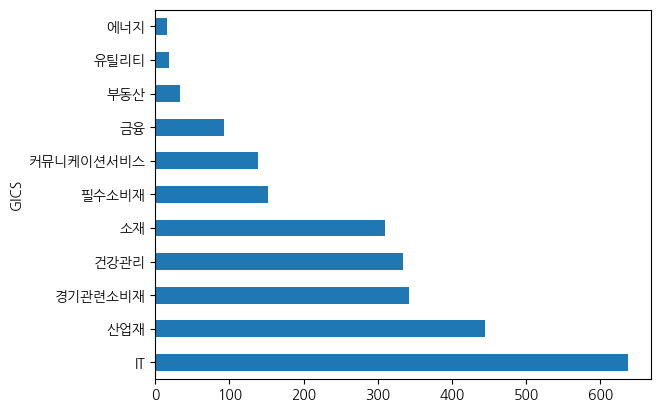

In [ ]:
import matplotlib.pyplot as plt

df['GICS'].value_counts().plot(kind = 'barh')

현재 있는 데이터를 통해 ROE를 계산해보자.

$ \frac{Price/Book\ Value}{Price / Earnings} = \frac{Earnings \cdot Price}{Book\ Value \cdot Price} = \frac{Earnings}{Book \ Value} = ROE$

In [ ]:
df_stock['ROE'] = df_stock['PBR'] / df_stock['선행 PER']

df_stock.head(10)

/tmp/ipython-input-20-2609620596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['ROE'] = df_stock['PBR'] / df_stock['선행 PER']


,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리,NaN
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재,NaN
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재,NaN
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재,NaN
5,A000080,하이트진로,20200.0,10.80,1.25,700.0,보통주,3.47,필수소비재,0.115741
7,A000100,유한양행,103600.0,57.57,3.70,500.0,보통주,0.48,건강관리,0.064270
9,A000120,CJ대한통운,87500.0,7.37,0.44,800.0,보통주,0.91,산업재,0.059701
10,A000140,하이트진로홀딩스,10300.0,NaN,0.40,350.0,보통주,3.40,필수소비재,NaN
12,A000150,두산,651000.0,43.23,7.83,2000.0,보통주,0.31,산업재,0.181124
15,A000180,성창기업지주,1579.0,NaN,0.19,0.0,보통주,0.00,소재,NaN


ROE가 10% 이상, PBR이 1 미만, PER 5 미만, 배당수익률 4% 이상인 종목을 찾아보자.

In [ ]:
df_stock[(df_stock['ROE'] >= 0.1) & (df_stock['PBR'] < 1) & (df_stock['선행 PER'] < 5) & (df_stock['배당수익률'] > 4)]

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE
24,A000270,기아,97700.0,4.23,0.69,6500.0,보통주,6.65,경기관련소비재,0.163121
288,A005380,현대차,205000.0,4.68,0.50,12000.0,보통주,5.85,경기관련소비재,0.106838
312,A005830,DB손해보험,122300.0,4.93,0.79,6800.0,보통주,5.56,금융,0.160243
822,A035600,KG이니시스,10820.0,4.08,0.60,500.0,보통주,4.62,금융,0.147059
1257,A071320,지역난방공사,82300.0,3.56,0.42,3879.0,보통주,4.71,유틸리티,0.117978
1568,A105630,한세실업,10450.0,4.60,0.58,500.0,보통주,4.78,경기관련소비재,0.126087
1598,A111380,동인기연,15090.0,4.48,0.60,620.0,보통주,4.11,경기관련소비재,0.133929
1643,A122450,KX,4140.0,3.67,0.50,190.0,보통주,4.59,커뮤니케이션서비스,0.136240
1780,A161390,한국타이어앤테크놀로지,39650.0,4.02,0.44,2000.0,보통주,5.04,경기관련소비재,0.109453
1858,A194370,제이에스코퍼레이션,11360.0,3.69,0.65,500.0,보통주,4.40,경기관련소비재,0.176152


각 섹터별 ROE, PBR의 중위수를 구해보자.

In [ ]:
df_grouped = df_stock.groupby('GICS')[['ROE', 'PBR']].median()
df_grouped = df_grouped.reset_index()

df_grouped

,GICS,ROE,PBR
0,IT,0.122432,1.150
1,건강관리,0.112287,1.870
2,경기관련소비재,0.111111,0.625
3,금융,0.094541,0.700
4,부동산,0.051635,0.320
5,산업재,0.097268,1.020
6,소재,0.068773,0.590
7,에너지,0.074541,0.760
8,유틸리티,0.123073,0.480
9,커뮤니케이션서비스,0.099007,1.260


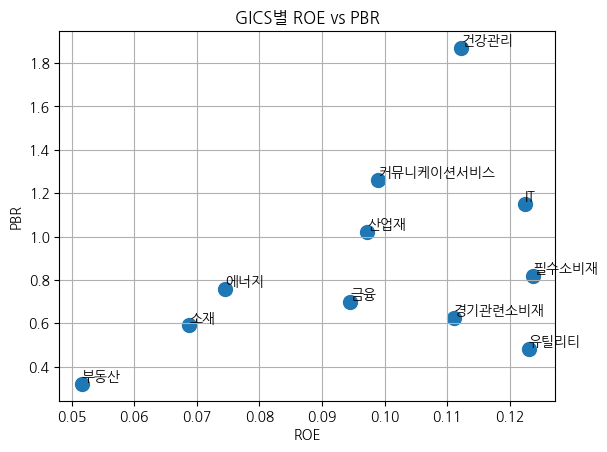

In [ ]:
plt.scatter(df_grouped['ROE'], df_grouped['PBR'], s=100)

# 라벨 붙이기
for i, row in df_grouped.iterrows():
    plt.text(row['ROE'], row['PBR'], row['GICS'], fontsize=10, ha='left', va='bottom')

plt.title('GICS별 ROE vs PBR')
plt.xlabel('ROE')
plt.ylabel('PBR')
plt.grid(True)

이제 마법공식을 이용한 종목 선정을 해보자. 먼저 각 종목의 ROE와 PBR의 순위를 구해야 한다.

1. PBR은 낮을수록 좋으므로 오름차순을 한다. (마이너스는 제거되었으므로)
2. ROE는 높을수록 좋으므로 내림차순을 한다.

In [ ]:
df_stock['rank_pbr'] = df_stock['PBR'].rank()
df_stock['rank_roe'] = df_stock['ROE'].rank(ascending = False)

df_stock

/tmp/ipython-input-24-1098801932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['rank_pbr'] = df_stock['PBR'].rank()
/tmp/ipython-input-24-1098801932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['rank_roe'] = df_stock['ROE'].rank(ascending = False)


,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE,rank_pbr,rank_roe
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리,NaN,531.5,NaN
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재,NaN,977.0,NaN
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재,NaN,73.0,NaN
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재,NaN,164.0,NaN
5,A000080,하이트진로,20200.0,10.80,1.25,700.0,보통주,3.47,필수소비재,0.115741,1511.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2728,A487570,HS효성,70000.0,NaN,0.47,0.0,보통주,0.00,산업재,NaN,482.0,NaN
2733,A489460,바이오비쥬,18150.0,NaN,7.01,0.0,보통주,0.00,NaN,NaN,2371.5,NaN
2735,A489500,엘케이켐,20050.0,NaN,3.06,0.0,보통주,0.00,소재,NaN,2118.0,NaN
2737,A489790,한화비전,51000.0,12.26,3.12,0.0,보통주,0.00,IT,0.254486,2128.5,61.0


이제 PBR의 랭크와 ROE를 랭크를 합한 후, 재랭크를 구한다. 그 후 20위 이내인 종목은 'Y' 아니면 'N'이라 표기한다.

In [ ]:
import numpy as np

df_stock['rank_final'] = (df_stock['rank_pbr'] + df_stock['rank_roe']).rank()
df_stock['invest'] = np.where(df_stock['rank_final'] <= 20, 'Y', 'N')
df_stock

/tmp/ipython-input-25-3195565014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['rank_final'] = (df_stock['rank_pbr'] + df_stock['rank_roe']).rank()
/tmp/ipython-input-25-3195565014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['invest'] = np.where(df_stock['rank_final'] <= 20, 'Y', 'N')


,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE,rank_pbr,rank_roe,rank_final,invest
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리,NaN,531.5,NaN,NaN,N
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재,NaN,977.0,NaN,NaN,N
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재,NaN,73.0,NaN,NaN,N
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재,NaN,164.0,NaN,NaN,N
5,A000080,하이트진로,20200.0,10.80,1.25,700.0,보통주,3.47,필수소비재,0.115741,1511.0,246.0,289.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,A487570,HS효성,70000.0,NaN,0.47,0.0,보통주,0.00,산업재,NaN,482.0,NaN,NaN,N
2733,A489460,바이오비쥬,18150.0,NaN,7.01,0.0,보통주,0.00,NaN,NaN,2371.5,NaN,NaN,N
2735,A489500,엘케이켐,20050.0,NaN,3.06,0.0,보통주,0.00,소재,NaN,2118.0,NaN,NaN,N
2737,A489790,한화비전,51000.0,12.26,3.12,0.0,보통주,0.00,IT,0.254486,2128.5,61.0,403.0,N


마법공식으로 선택된 20 종목을 확인해보자.

In [ ]:
df_stock[df_stock['invest'] == 'Y']

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE,rank_pbr,rank_roe,rank_final,invest
28,A000370,한화손해보험,5700.0,2.28,0.31,0.0,보통주,0.00,금융,0.135965,164.0,201.0,2.0,Y
146,A002460,HS화성,11200.0,4.77,0.28,500.0,보통주,4.46,산업재,0.058700,119.5,438.0,20.0,Y
192,A003380,하림지주,9000.0,4.54,0.29,120.0,보통주,1.33,필수소비재,0.063877,133.5,423.0,19.0,Y
233,A004150,한솔홀딩스,3235.0,5.31,0.23,120.0,보통주,3.71,소재,0.043315,58.0,485.0,12.5,Y
316,A005880,대한해운,1605.0,3.39,0.26,0.0,보통주,0.00,산업재,0.076696,83.5,375.0,4.0,Y
322,A005960,동부건설,5380.0,3.65,0.27,200.0,보통주,3.72,산업재,0.073973,101.5,390.0,6.0,Y
527,A013580,계룡건설,20300.0,2.01,0.21,400.0,보통주,1.97,산업재,0.104478,37.0,273.0,1.0,Y
549,A014790,HL D&I,2715.0,3.30,0.27,0.0,보통주,0.00,산업재,0.081818,101.5,354.0,3.0,Y
570,A016250,SGC E&C,16600.0,5.95,0.20,500.0,보통주,3.01,산업재,0.033613,27.5,515.0,11.0,Y
601,A017940,E1,78000.0,4.97,0.27,3450.0,보통주,4.42,에너지,0.054326,101.5,451.0,18.0,Y


In [ ]:
# CSV로 저장 후 로컬 파일로 저장하기
# 저장 후 왼쪽 메뉴에서 파일 다운로드 가능

df_stock.to_csv('df_stock.csv')

이번에는 모든 종목 대비 선택된 종목들의 `ROE-PBR`이 어디에 분포되어 있는지 확인해보자.

```
[GPT]

이 데이터베이스에서
X축에는 ROE, Y축에는 PBR을 놓고
invest열의 Y와 N에 따라 색깔이 다르게 점도표를 찍고 싶어
데이터를 입력하는 코드는 생략
```

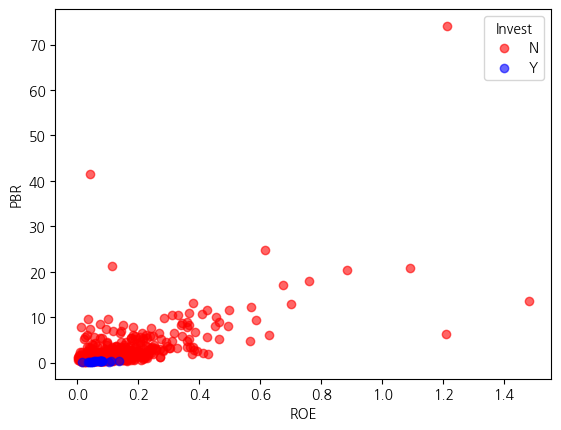

In [ ]:
import matplotlib.pyplot as plt

# 점도표 생성
fig, ax = plt.subplots()
colors = {'Y': 'blue', 'N': 'red'}

for invest_value in df_stock['invest'].unique():
    subset = df_stock[df_stock['invest'] == invest_value]
    ax.scatter(subset['ROE'], subset['PBR'], label=invest_value, color=colors[invest_value], alpha=0.6)

ax.set_xlabel('ROE')
ax.set_ylabel('PBR')
ax.legend(title='Invest')
plt.show()

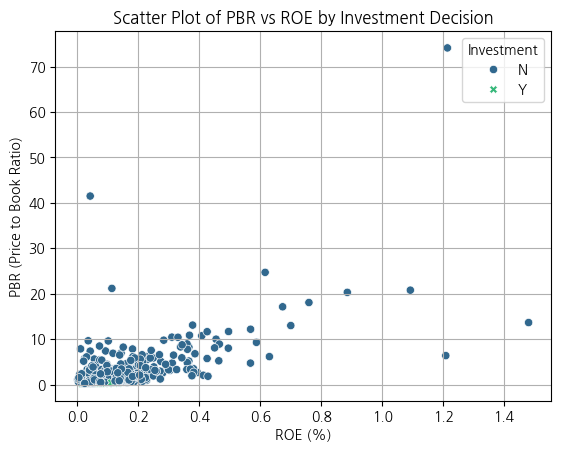

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df_stock, x='ROE', y='PBR', hue='invest', style='invest', palette='viridis')

# 그래프 제목과 축 이름 설정
plt.title('Scatter Plot of PBR vs ROE by Investment Decision')
plt.xlabel('ROE (%)')
plt.ylabel('PBR (Price to Book Ratio)')

# 범례 표시
plt.legend(title='Investment')

# 그래프 표시
plt.grid(True)  # 격자 추가
plt.show()

x축과 y축의 범위가 너무 넓어 차이가 잘 보이지 않으며, 색 구분도 잘 되지 않는다. 이를 수정해보자.

```
[GPT]

x축은 0에서 1까지, y축은 0에서 20까지 나타내고 색깔 구분을 더 명확하게 하고 싶어, 점 모양도 다르게 하고 싶어
```

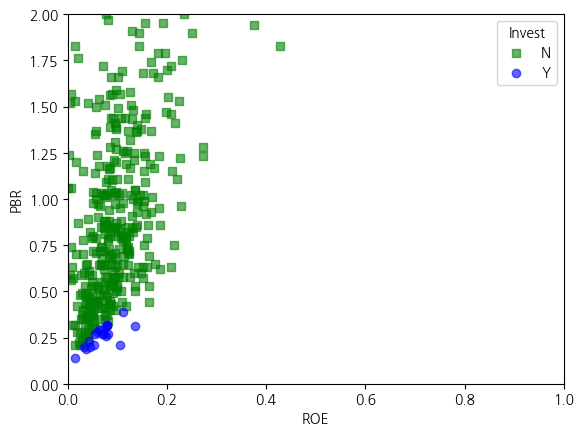

In [ ]:
import matplotlib.pyplot as plt

# 점도표 생성
fig, ax = plt.subplots()
colors = {'Y': 'blue', 'N': 'green'}
markers = {'Y': 'o', 'N': 's'}

for invest_value in df_stock['invest'].unique():
    subset = df_stock[df_stock['invest'] == invest_value]
    ax.scatter(subset['ROE'], subset['PBR'], label=invest_value, color=colors[invest_value], marker=markers[invest_value], alpha=0.6)

ax.set_xlabel('ROE')
ax.set_xlim(0, 1)
ax.set_ylabel('PBR')
ax.set_ylim(0, 2)
ax.legend(title='Invest')
plt.show()


선택된 종목들의 섹터를 살펴보자.

In [ ]:
df_stock[df_stock['invest'] == 'Y']['GICS'].value_counts()

,count
GICS,
산업재,8
소재,3
금융,2
경기관련소비재,2
부동산,2
필수소비재,1
에너지,1
유틸리티,1


만년 저평가 섹터에 종목이 쏠려있다. 이러한 문제를 해결하기 위해 섹터를 중립화한 후, 종목을 선택한다.

- 섹터별로 그룹을 나눔
- 그룹 내에서 ROE / PBR 기준 순위를 구함
- 순위를 Z-Score로 환산
- Z-Score를 합함
- 합 기준 상위 n개 종목

In [ ]:
from scipy.stats import zscore

def rank_and_score(group):
    group = group.copy()
    group['rank_roe'] = group['ROE'].rank(ascending=False)
    group['rank_pbr'] = group['PBR'].rank(ascending=True)
    group['z_roe'] = zscore(group['rank_roe'],  nan_policy='omit')
    group['z_pbr'] = zscore(group['rank_pbr'],  nan_policy='omit')
    group['z_sum'] = group['z_roe'] + group['z_pbr']
    return group

df_result = df_stock.groupby('GICS', group_keys=False).apply(rank_and_score)

/tmp/ipython-input-32-727006975.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_result = df_stock.groupby('GICS', group_keys=False).apply(rank_and_score)


In [ ]:
df_result

import numpy as np

df_result['rank_final'] = df_result['z_sum'].rank()
df_result['invest'] = np.where(df_result['rank_final'] <= 20, 'Y', 'N')

df_result

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE,rank_pbr,rank_roe,rank_final,invest,z_roe,z_pbr,z_sum
0,A000020,동화약품,6650.0,NaN,0.49,180.0,보통주,2.71,건강관리,NaN,19.5,NaN,NaN,N,NaN,-1.533827,NaN
1,A000040,KR모터스,409.0,NaN,0.75,0.0,보통주,0.00,경기관련소비재,NaN,198.0,NaN,NaN,N,NaN,0.292112,NaN
2,A000050,경방,7650.0,NaN,0.25,150.0,보통주,1.96,경기관련소비재,NaN,17.0,NaN,NaN,N,NaN,-1.563055,NaN
3,A000070,삼양홀딩스,85500.0,NaN,0.31,3500.0,보통주,4.09,필수소비재,NaN,9.0,NaN,NaN,N,NaN,-1.538463,NaN
5,A000080,하이트진로,20200.0,10.80,1.25,700.0,보통주,3.47,필수소비재,0.115741,107.0,24.0,439.0,N,0.076999,0.695157,0.772156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,A484870,엠앤씨솔루션,158100.0,25.46,8.75,1480.0,보통주,0.94,산업재,0.343676,424.0,8.0,281.0,N,-1.527525,1.602199,0.074674
2728,A487570,HS효성,70000.0,NaN,0.47,0.0,보통주,0.00,산업재,NaN,96.5,NaN,NaN,N,NaN,-0.976279,NaN
2735,A489500,엘케이켐,20050.0,NaN,3.06,0.0,보통주,0.00,소재,NaN,289.0,NaN,NaN,N,NaN,1.523432,NaN
2737,A489790,한화비전,51000.0,12.26,3.12,0.0,보통주,0.00,IT,0.254486,531.5,14.0,190.0,N,-1.348773,1.173876,-0.174898


In [ ]:
df_result[df_result['invest'] == 'Y']

,종목코드,종목명,종가,선행 PER,PBR,주당배당금,종목구분,배당수익률,GICS,ROE,rank_pbr,rank_roe,rank_final,invest,z_roe,z_pbr,z_sum
28,A000370,한화손해보험,5700.0,2.28,0.31,0.0,보통주,0.00,금융,0.135965,5.5,10.0,2.0,Y,-0.792118,-1.542011,-2.334129
90,A001450,현대해상,26650.0,2.70,0.44,0.0,보통주,0.00,금융,0.162963,20.0,4.0,1.0,Y,-1.386207,-0.989933,-2.376140
180,A003090,대웅,23450.0,6.37,0.96,200.0,보통주,0.85,건강관리,0.150706,77.5,20.0,10.0,Y,-0.567480,-0.928644,-1.496124
296,A005440,현대지에프홀딩스,8570.0,4.14,0.40,210.0,보통주,2.45,산업재,0.096618,55.0,68.0,19.0,Y,0.109109,-1.303017,-1.193908
494,A011760,현대코퍼레이션,28700.0,3.25,0.53,700.0,보통주,2.44,산업재,0.163077,118.5,42.0,14.0,Y,-0.600099,-0.803068,-1.403167
513,A012630,HDC,22450.0,4.94,0.43,350.0,보통주,1.56,소재,0.087045,95.5,18.0,16.0,Y,-0.629941,-0.660154,-1.290095
527,A013580,계룡건설,20300.0,2.01,0.21,400.0,보통주,1.97,산업재,0.104478,12.0,58.0,4.0,Y,-0.163663,-1.641565,-1.805229
601,A017940,E1,78000.0,4.97,0.27,3450.0,보통주,4.42,에너지,0.054326,1.0,3.0,20.0,Y,0.447214,-1.626978,-1.179765
669,A023910,대한약품,30050.0,5.27,0.64,900.0,보통주,3.00,건강관리,0.121442,34.5,24.0,6.0,Y,-0.328541,-1.377314,-1.705856
786,A033270,유나이티드제약,20250.0,6.11,0.73,450.0,보통주,2.22,건강관리,0.119476,49.0,26.0,12.0,Y,-0.209072,-1.226019,-1.435090


In [ ]:
df_result[df_result['invest'] == 'Y']['GICS'].value_counts()

,count
GICS,
금융,4
건강관리,4
산업재,4
소재,3
IT,2
에너지,1
커뮤니케이션서비스,1
부동산,1


기존 대비 훨씬 더 다양한 섹터에 분산되었다.

In [ ]:
pd.concat([
    df_stock[df_stock['invest'] == 'Y'][['ROE', 'PBR']].agg(['min', 'max', 'median']),
    df_result[df_result['invest'] == 'Y'][['ROE', 'PBR']].agg(['min', 'max', 'median'])
], axis=1, keys=['중립X', '중립O'])

중립X             중립O      
             ROE   PBR       ROE   PBR
min     0.015402  0.14  0.054326  0.21
max     0.135965  0.39  0.227488  1.11
median  0.071470  0.27  0.121095  0.47